In [29]:
import git
from git import Repo

from unidiff import PatchSet

import subprocess
import json
import pandas as pd
import numpy as np
import matplotlib
import sys
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Covariance Matrix 
mutants_and_tests = pd.read_pickle('flask_dataset_every_mutant_with_checkout_on_failure.pkl')
mutants_and_tests.reset_index()
mutants_and_tests["outcome"] = mutants_and_tests["outcome"].astype('bool')
mutants_and_tests["outcome"]

mutant_id
1.0       True
1.0       True
1.0       True
1.0       True
1.0       True
          ... 
2090.0    True
2090.0    True
2090.0    True
2090.0    True
2090.0    True
Name: outcome, Length: 937873, dtype: bool

In [ ]:
mutants_and_tests[1933]

# Correlation Matrix

0.013776934908238406
0.0755596039840519


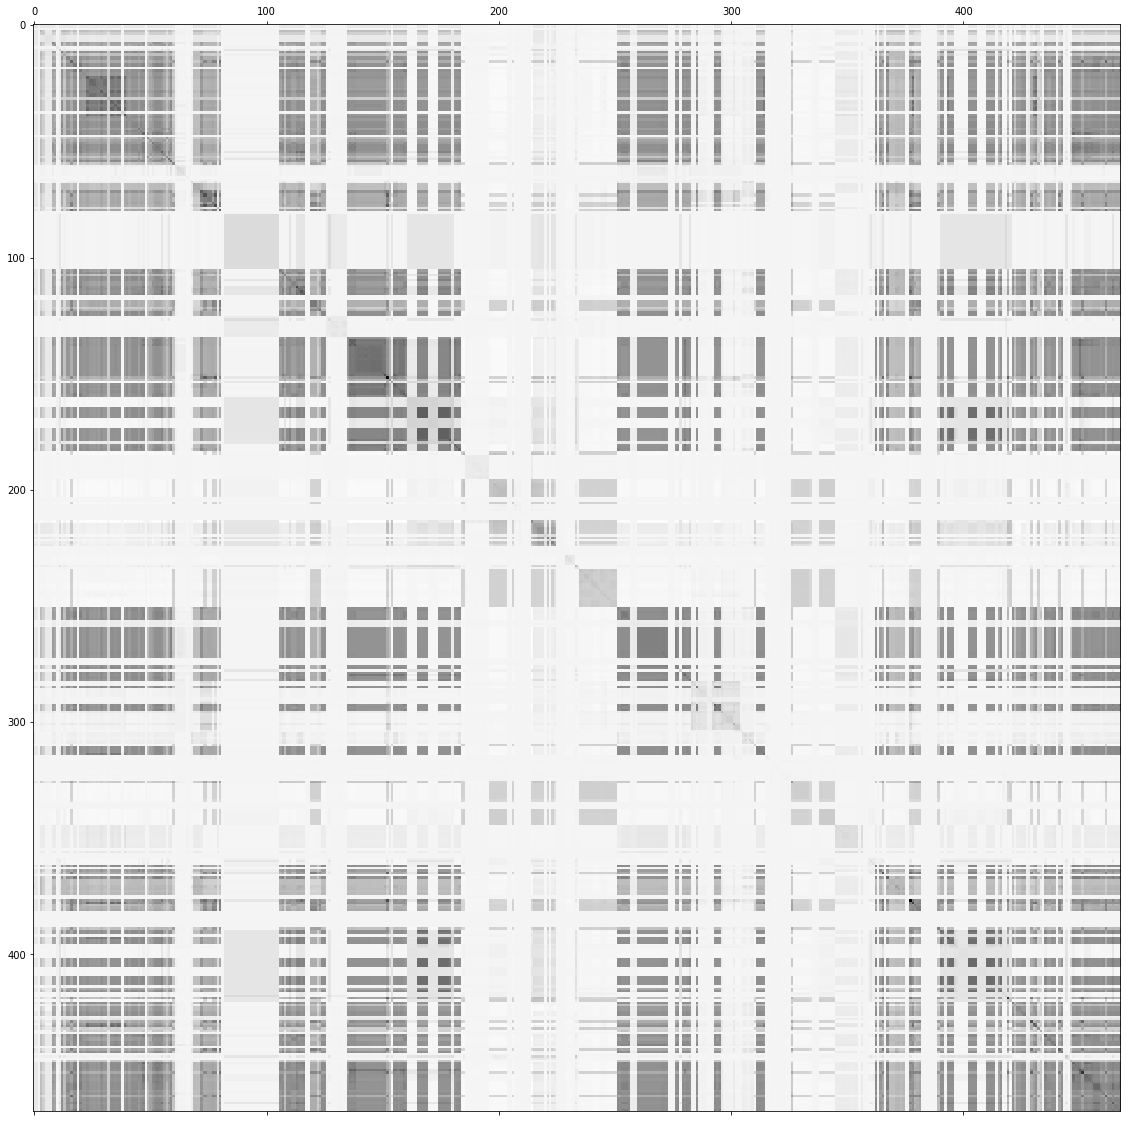

In [380]:
pivot = mutants_and_tests.pivot(columns='test_id', values='outcome')
pivot.drop(pivot.columns[0], axis=1, inplace=True)
# print(pivot.columns)
# display(pivot.cov())
pivot = pivot.astype('bool')

fig, ax = plt.subplots(figsize=(20,20))
ax.matshow(pivot.cov(), cmap=plt.get_cmap('binary')
plt.show()

False

# 2D Embedding of Covariance Distances

In [33]:
from sklearn.manifold import MDS

In [298]:
file_changed_to_fail_test_most_often = failures.reset_index().groupby(['test_id','modified_file_path']).count().reset_index().groupby(['test_id']).apply(max)

In [332]:
# Encoding
file_changed_to_fail_test_most_often["modified_file_path"] = file_changed_to_fail_test_most_often["modified_file_path"].astype('category')
file_changed_to_fail_test_most_often["modified_file_path_enc"] = file_changed_to_fail_test_most_often["modified_file_path"].cat.codes

file_changed_to_fail_test_most_often.groupby(['modified_file_path_enc']).count()

,test_id,modified_file_path,mutant_id,current_line,line_number_changed,previous_line,outcome
modified_file_path_enc,,,,,,,
0,2,2,2,2,2,2,2
1,26,26,26,26,26,26,26
2,2,2,2,2,2,2,2
3,85,85,85,85,85,85,85
4,8,8,8,8,8,8,8
5,12,12,12,12,12,12,12
6,3,3,3,3,3,3,3
7,8,8,8,8,8,8,8
8,62,62,62,62,62,62,62


In [321]:
pivot_without_failures = mutants_and_tests[mutants_and_tests['outcome'] == False].pivot(columns='test_id', values='outcome')
pivot_without_failures.drop(pivot_without_failures.columns[0], axis=1, inplace=True)
# print(pivot.columns)
# display(pivot.cov())
pivot_without_failures = pivot_without_failures.astype('bool')
print(pivot_without_failures.shape)
# fig, ax = plt.subplots(figsize=(20,20))
# ax.matshow(pivot_without_failures.cov(), cmap=plt.get_cmap('Reds'))
# plt.show()

(1298, 447)


(448,)
test_id
0.0       7
1.0       7
2.0       3
3.0      11
4.0      11
         ..
463.0    11
464.0    11
465.0    11
466.0    11
467.0    11
Name: modified_file_path_enc, Length: 448, dtype: int8


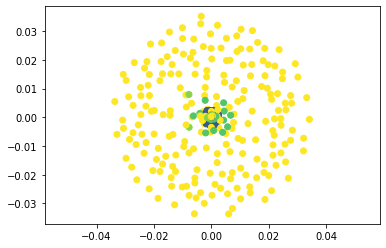

In [330]:
model = MDS(n_components=2, dissimilarity='precomputed', random_state=10)
out = model.fit_transform(pivot_without_failures.cov())
colorize = file_changed_to_fail_test_most_often['modified_file_path_enc']
#print(out)
print(colorize.shape)
print(colorize)
plt.scatter(out[:, 0], out[:, 1], c=colorize[1:])
plt.axis('equal');

# Hierarchical Plot of tests

x axis = id of changed line
y axis = number of lines that make test fail
y = number of lines that make this testfail

,current_line,line_number_changed,modified_file_path,previous_line,test_id,outcome
mutant_id,,,,,,
2.0,"if isinstance(value, timedelta):\n",58.0,src/flask/app.py,"if not isinstance(value, timedelta):\n",23.0,False
2.0,"if isinstance(value, timedelta):\n",58.0,src/flask/app.py,"if not isinstance(value, timedelta):\n",29.0,False
2.0,"if isinstance(value, timedelta):\n",58.0,src/flask/app.py,"if not isinstance(value, timedelta):\n",33.0,False
2.0,"if isinstance(value, timedelta):\n",58.0,src/flask/app.py,"if not isinstance(value, timedelta):\n",34.0,False
2.0,"if isinstance(value, timedelta):\n",58.0,src/flask/app.py,"if not isinstance(value, timedelta):\n",36.0,False
...,...,...,...,...,...,...
2090.0,data = args and kwargs\n,329.0,src/flask/json/__init__.py,data = args or kwargs\n,270.0,False
2090.0,data = args and kwargs\n,329.0,src/flask/json/__init__.py,data = args or kwargs\n,271.0,False
2090.0,data = args and kwargs\n,329.0,src/flask/json/__init__.py,data = args or kwargs\n,272.0,False


,current_line,line_number_changed,modified_file_path,previous_line,outcome
test_id,,,,,
0.0,36,36,36,36,36
1.0,17,17,17,17,17
2.0,3,3,3,3,3
3.0,71,71,71,71,71
4.0,48,48,48,48,48
...,...,...,...,...,...
463.0,137,137,137,137,137
464.0,187,187,187,187,187
465.0,139,139,139,139,139


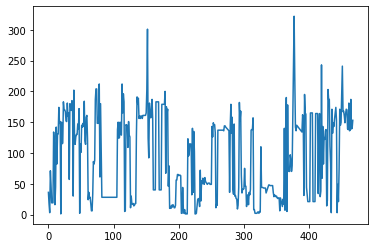

In [95]:
failures = mutants_and_tests[mutants_and_tests['outcome'] == False]
display(failures)

xy = failures.groupby(['test_id']).count()
display(xy)

plt.plot(xy['outcome'])

plt.show()

41412


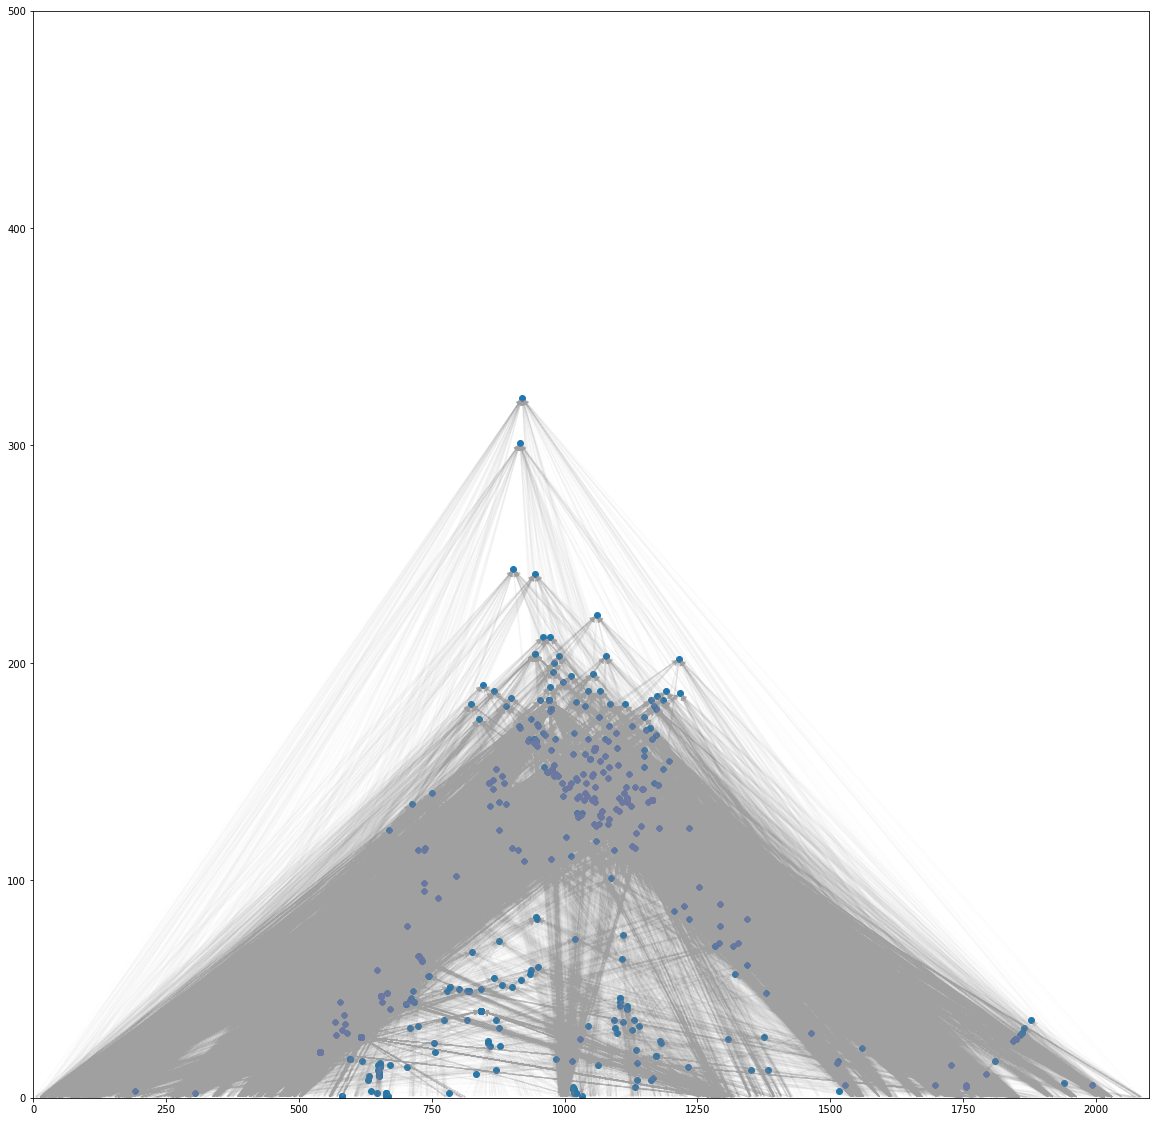

In [283]:
y = failures.groupby(['test_id']).count()['outcome']
x = failures.reset_index().groupby(['test_id']).mean()['mutant_id']
# display(x)
# display(y)


fig, ax = plt.subplots(1,1,figsize=(20,20))
ax.set_xlim(0, 2100)
ax.set_ylim(0,500)
ax.scatter(x=x, y=y)
print(len(failures.reset_index().values))
for test_failure in failures.reset_index().values[1::1]:
   # print(test_failure)
    x_start = test_failure[0] # mutant_id
    y_start = 0
    test_id = test_failure[5]
    x_end = x[test_id]
    y_end = y[test_id]
    #print(x_start)
    #print(y_start)
    #print(x_end)
    #print(y_end)
    ax.annotate("", xy=(x_end, y_end), xytext=(x_start, y_start), arrowprops={'arrowstyle': '->', 'color': '#A0A0A005'})
plt.show()
#plt.arrow(100, 100, 0, 0, width=1)

In [364]:
x.loc[x > 1820]

test_id
345.0    1877.388889
346.0    1856.896552
347.0    1864.531250
348.0    1861.166667
349.0    1857.551724
350.0    1861.333333
351.0    1849.296296
352.0    1844.615385
353.0    1849.037037
354.0    1849.148148
355.0    1991.666667
356.0    1847.962963
363.0    1939.714286
Name: mutant_id, dtype: float64

In [370]:
failures.loc[failures['test_id']  == 345]

,current_line,line_number_changed,modified_file_path,previous_line,test_id,outcome
mutant_id,,,,,,
69.0,"""XXJSON_AS_ASCIIXX"": True,\n",326.0,src/flask/app.py,"""JSON_AS_ASCII"": True,\n",345.0,False
71.0,"""XXJSON_SORT_KEYSXX"": True,\n",327.0,src/flask/app.py,"""JSON_SORT_KEYS"": True,\n",345.0,False
1744.0,if top is not None:\n,23.0,src/flask/globals.py,if top is None:\n,345.0,False
1750.0,app_ctx_stack = None\n,44.0,src/flask/globals.py,app_ctx_stack = LocalStack()\n,345.0,False
1953.0,self.serializer = None\n,64.0,src/flask/json/tag.py,self.serializer = serializer\n,345.0,False
1956.0,key = None\n,94.0,src/flask/json/tag.py,"key = "" di""\n",345.0,False
1957.0,and len(value) != 1\n,99.0,src/flask/json/tag.py,and len(value) == 1\n,345.0,False
1958.0,and len(value) == 2\n,99.0,src/flask/json/tag.py,and len(value) == 1\n,345.0,False
1959.0,and next(iter(value)) not in self.s...,100.0,src/flask/json/tag.py,and next(iter(value)) in self.seria...,345.0,False
